In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [24]:
#importing Data---
df=pd.read_csv("titanic-passengers.csv",sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [25]:
#preprocessing------
#----Cleaning-------
df['Cabin'].fillna("AAA",inplace=True)
df.isnull().sum().sum()
df['Age'].fillna(df['Age'].median(),inplace=True)
df.isnull().sum().sum()
df['Embarked'].fillna("Yes",inplace=True)
df.isnull().sum().sum()
#------
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,AAA,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,AAA,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,AAA,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


(array([0, 1]), <a list of 2 Text xticklabel objects>)

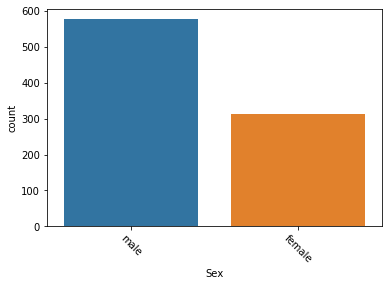

In [26]:
import seaborn as sns 
#--------distribution du Sex
sns.countplot(x='Sex',data=df)
plt.xticks(rotation=-45)

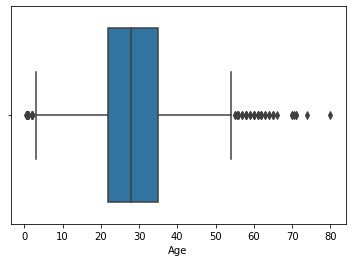

In [27]:
sns.boxplot(df['Age'])

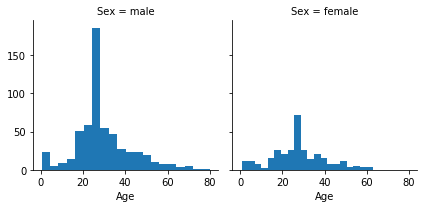

In [28]:
#Correlation using Seaborn the Age of Survivals----------------------
g=sns.FacetGrid(df,col="Sex")  
g.map(plt.hist,'Age',bins=20)

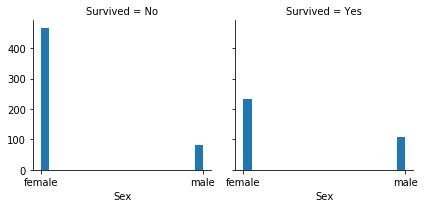

In [29]:
#Correlation using Seaborn the Age of Survivals----------------------
g=sns.FacetGrid(df,col="Survived")  
g.map(plt.hist,'Sex',bins=20)

C:\Users\Houssem Maalej\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Houssem Maalej\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


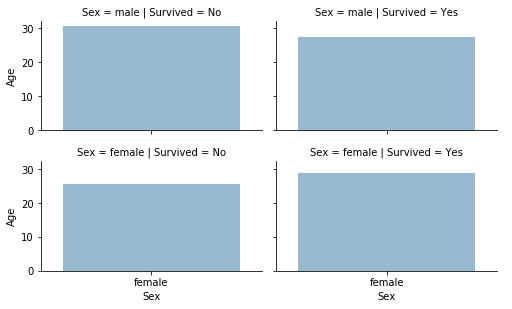

In [30]:
#Correlating multiple numerical and categorical features
grid=sns.FacetGrid(df,row='Sex',col="Survived",size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Age',alpha=.5,ci=None)
grid.add_legend()

In [31]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

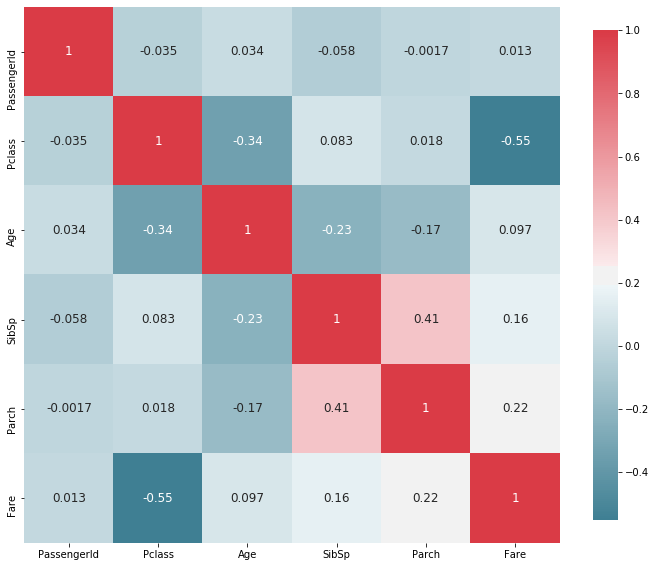

In [32]:
plot_correlation_map( df )
#this function return a table showing correlation coefficients between variables. 
#Each cell in the table shows the correlation between two variables. 
#it's used to summarize data.

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Survived']=encoder.fit_transform(df['Survived'])#we need to convert from categorical to numeric values!
df[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [34]:
#df.drop(['Name'], axis=1) #we deleted the column 'Name'


In [35]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,AAA,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,AAA,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,AAA,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,AAA,C
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,AAA,C
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,AAA,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,AAA,S


In [36]:
#extracting Title----------
extractedTitle=list()
for names in df['Name']:
    extractedTitle.append(names.replace('.',',').split(','))
    
extractedTitleFinal=list()    

for i in extractedTitle:
    extractedTitleFinal.append(i[1])
    
extractedTitleFinal 

[' Mr',
 ' Mr',
 ' Mr',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Dr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Major',
 ' Mrs',
 ' Don',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Master',
 ' Dr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mrs',
 ' Mrs',
 ' Miss',
 ' Miss',
 ' Master',
 ' Miss',
 ' Mr',
 ' Rev',
 ' Mr',
 ' Mrs',
 ' Mrs',
 ' Miss',
 ' Mr',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Miss',
 ' Miss',
 ' Mrs',
 ' Master',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mrs',
 ' Mrs',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Master',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mrs',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Master',
 ' Mr',
 ' Mr',
 ' Mr',

In [37]:
#----------------------
Title_Dictionary = {'Title':{

                    'Capt':       'Officer',

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer", 

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty", 

                  "the Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"}

                    }

In [38]:

# using insert function to create a new column 
df.insert(3, "Title", extractedTitleFinal, True)

# Print the DataFrame after addition 
# of new column 
df.replace(Title_Dictionary,inplace=True)

df

,PassengerId,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,Mr,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,AAA,S
1,76,0,3,Mr,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,Mr,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,AAA,S
3,568,0,3,Mrs,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,AAA,S
4,672,0,1,Mr,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,Mrs,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,AAA,C
887,61,0,3,Mr,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,AAA,C
888,535,0,3,Miss,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,AAA,S
889,102,0,3,Mr,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,AAA,S


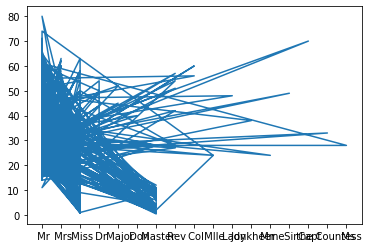

In [39]:
plt.plot(df['Title'],df['Age'])
plt.show()

C:\Users\Houssem Maalej\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


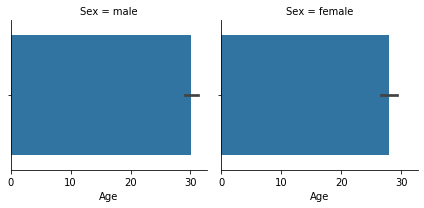

In [40]:
g=sns.FacetGrid(df,col="Sex")  
g.map(sns.barplot,'Age')

C:\Users\Houssem Maalej\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Houssem Maalej\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


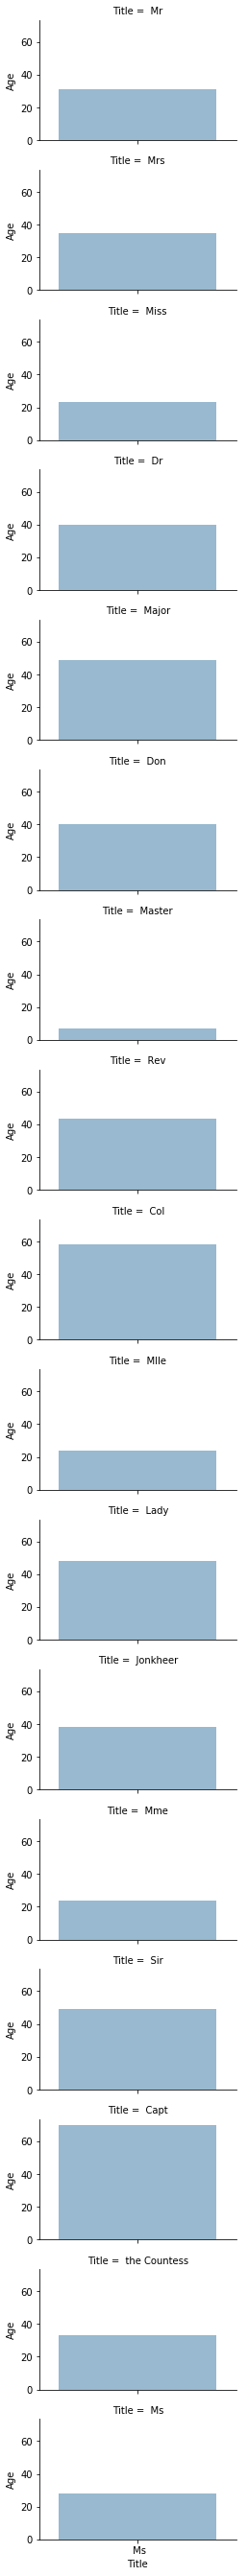

In [41]:

grid=sns.FacetGrid(df,row='Title',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Title','Age',alpha=.5,ci=None)
grid.add_legend()

In [42]:
#Correlation groupby example-----------------
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Survived']=encoder.fit_transform(df['Survived'])#we need to convert from categorical to numeric values!
df[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


***************************************Logistic_Regression*******************************************************

In [45]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Survived']=encoder.fit_transform(df['Survived'])#we need to convert from categorical to numeric values!
df['Sex']=encoder.fit_transform(df['Sex'])

In [46]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x=df[["Age", "Sex", "Pclass"]]
y=df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.79


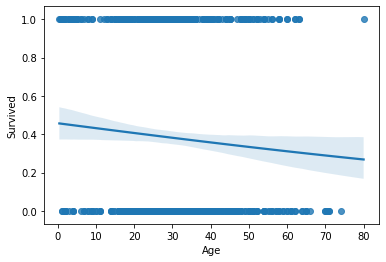

In [51]:
import seaborn as sns
sns.regplot(x='Age',y='Survived',data=df,logistic=True)

In [55]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Age'],colnames=['Survived'])
print(confusion_matrix)

Survived    0   1
Age              
0         161  28
1          37  86


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       189
           1       0.75      0.70      0.73       123

    accuracy                           0.79       312
   macro avg       0.78      0.78      0.78       312
weighted avg       0.79      0.79      0.79       312

